### 主題: Finding Lane Lines on the Road
- 2024 NCKU Autonomous-Driving Project 1
- Student ID: E24094198
- Student Name: 陳育政
***
Goal: Use `Python` and `OpenCV` to find the lane lines in the road images and videos

**Tech:**
- Color Selection: RGB/HSL/HSV
- Canny Edge Detection
- Region of Interest Selection(ROI)
- Hough Transform Line Detection

**test_images:** several different images for pipeline functionality test<br>
**test_videos:** several different videos for lane lines detection
***

### 相片擷取: Extract Frames from a specific videos

In [1]:
import os
from moviepy.editor import *

# this function will extract frames from the bonus.mp4 and save the jpg to bonus_images directory
def extract_frames(movie, times, imgdir):
    clip=VideoFileClip(movie)
    for t in times:
        imgpath=os.path.join(imgdir, '{}.jpg'.format(t))
        clip.save_frame(imgpath, t)
    
# extract the frames by calling the extract_frames function
movie='test_videos/bonus.mp4'
imgdir='bonus_images'
times=4,8,12,16,20,24

extract_frames(movie, times, imgdir)

### 載入相片: Load the Test Images from `test_images` and `bonus_images` director

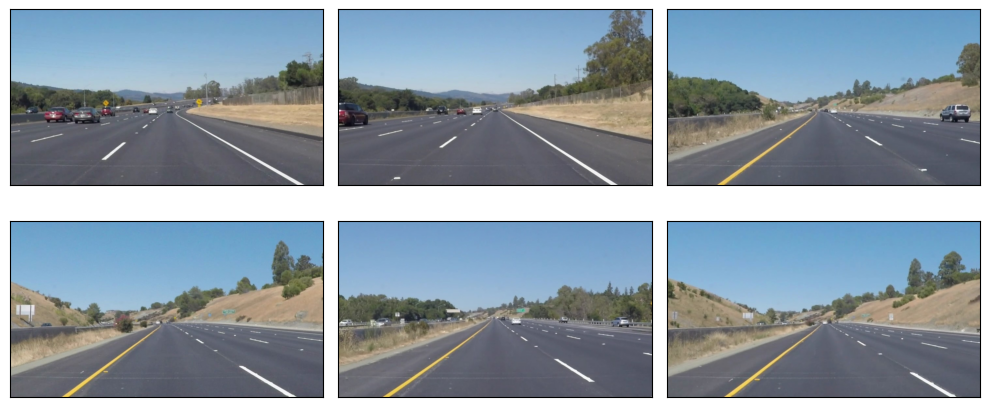

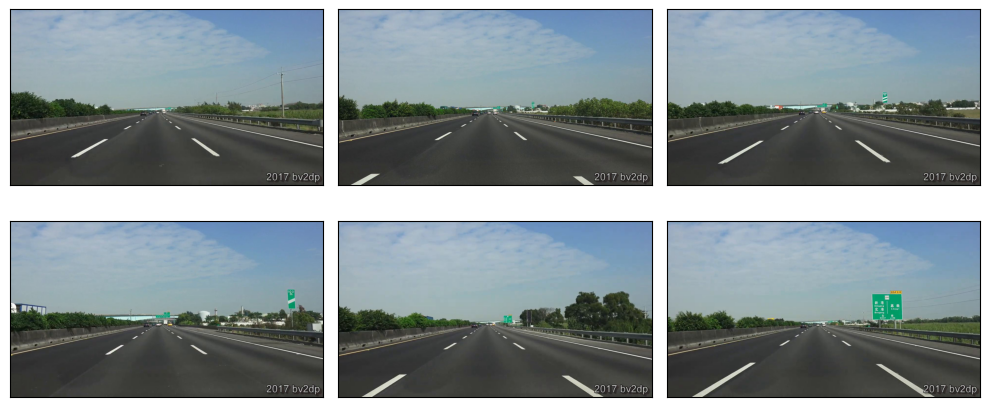

In [2]:
import matplotlib.pyplot as plt
import cv2
import os, glob
import numpy as np

# show images in subplot mode
def show_images(images, cmap=None):
    cols=3
    rows=(len(images))//cols
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # if the image is one channel, show in gray-scale
        cmap='gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(h_pad=0)
    plt.show()

# load the test_images and bonus_images
test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]
bonus_images = [plt.imread(path) for path in glob.glob('bonus_images/*.jpg')]

show_images(test_images)
show_images(bonus_images)

### Color Selection探討(RGB/HSL/HSV)

#### RGB

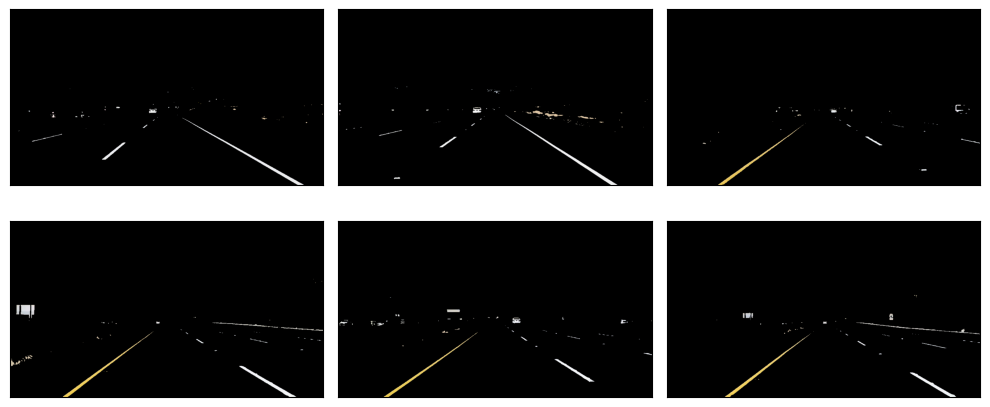

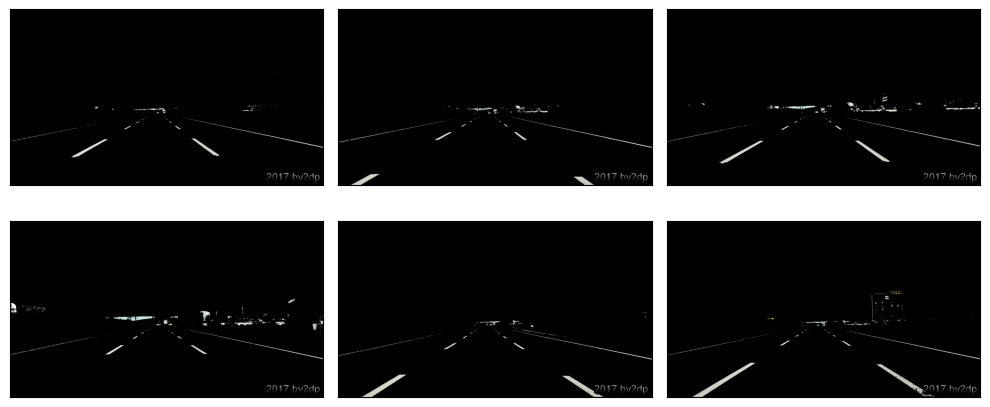

In [3]:
# since the line is either yellow or white, so we apply yellow mask and white mask to the images
def apply_yellow_white_mask_RGB(image):
    # white mask
    low=np.uint8([200, 200, 200])
    top=np.uint8([255, 255, 255])
    white_mask=cv2.inRange(image, low, top)

    # yellow mask
    low=np.uint8([190, 190, 0])
    top=np.uint8([255, 255, 255])
    yellow_mask=cv2.inRange(image, low, top)

    # combine the mask
    mask=cv2.bitwise_or(white_mask, yellow_mask)
    masked=cv2.bitwise_and(image, image, mask=mask)
    return masked

RGB_test_images=(list(map(apply_yellow_white_mask_RGB, test_images)))
RGB_bonus_images=(list(map(apply_yellow_white_mask_RGB, bonus_images)))

show_images(RGB_test_images)
show_images(RGB_bonus_images)



#### HSL

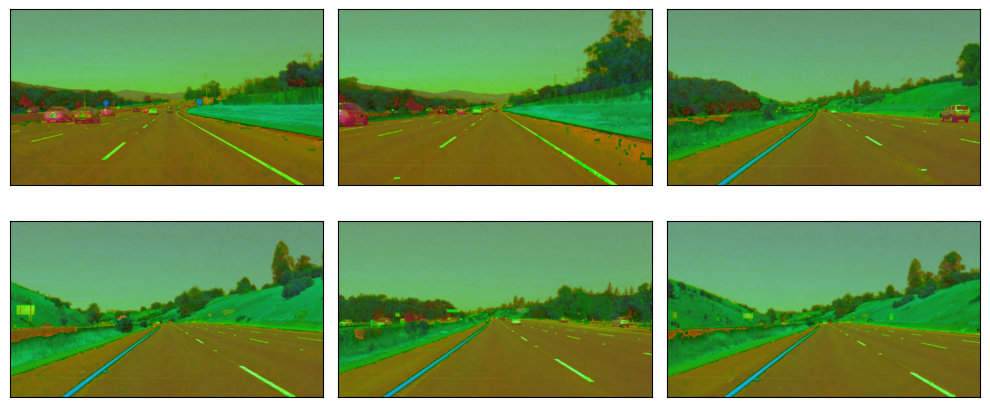

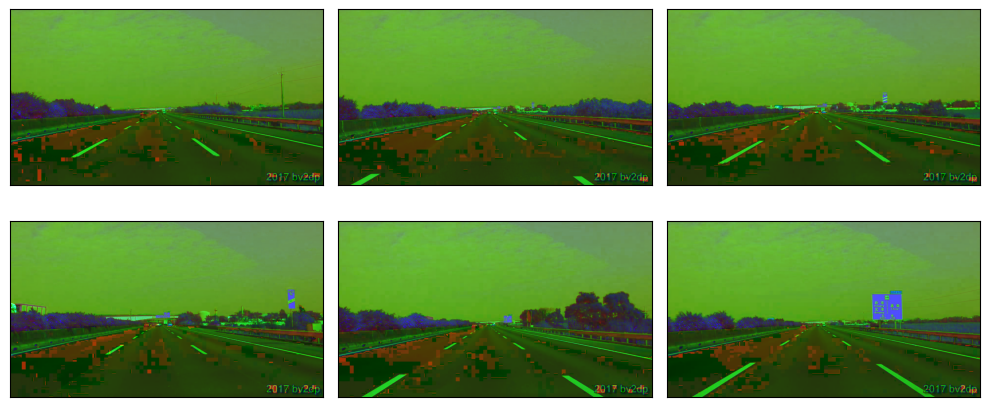

In [4]:
# convert images to HSL color space and show
def convert_HSL(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

show_images(list(map(convert_HSL, test_images)))
show_images(list(map(convert_HSL, bonus_images)))

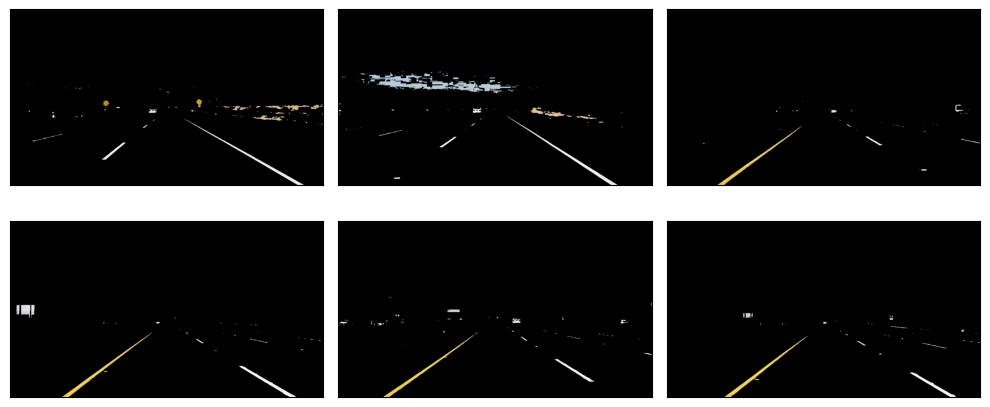

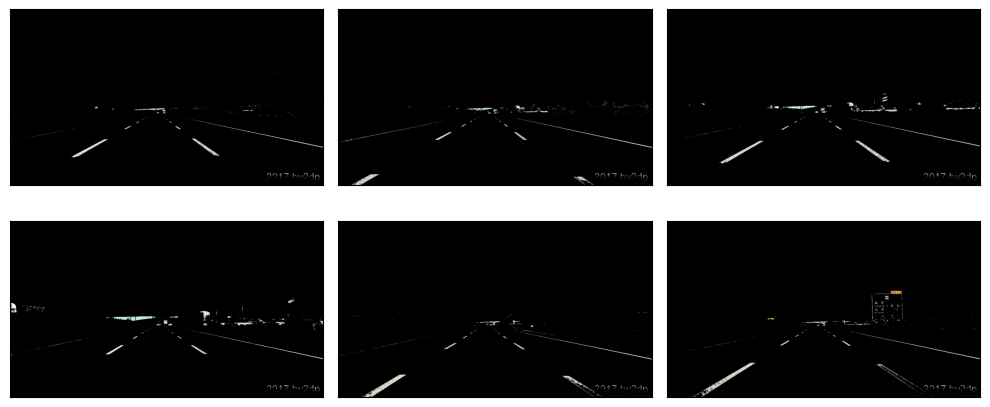

In [5]:
def apply_yellow_white_mask_HSL(image):
    # used cv2 built-in function to convert images to HSL color space
    converted_image=convert_HSL(image)
    # white mask
    low=np.uint8([0, 200, 0])
    top=np.uint8([255, 255, 255])
    white_mask=cv2.inRange(converted_image, low, top)

    # yellow mask
    low=np.uint8([10, 0, 100])
    top=np.uint8([40, 255, 255])
    yellow_mask=cv2.inRange(converted_image, low, top)

    # combine the mask
    mask=cv2.bitwise_or(white_mask, yellow_mask)
    masked=cv2.bitwise_and(image, image, mask=mask)
    return masked

HSL_test_images=(list(map(apply_yellow_white_mask_HSL, test_images)))
HSL_bonus_images=(list(map(apply_yellow_white_mask_HSL, bonus_images)))

show_images(HSL_test_images)
show_images(HSL_bonus_images)

#### HSV

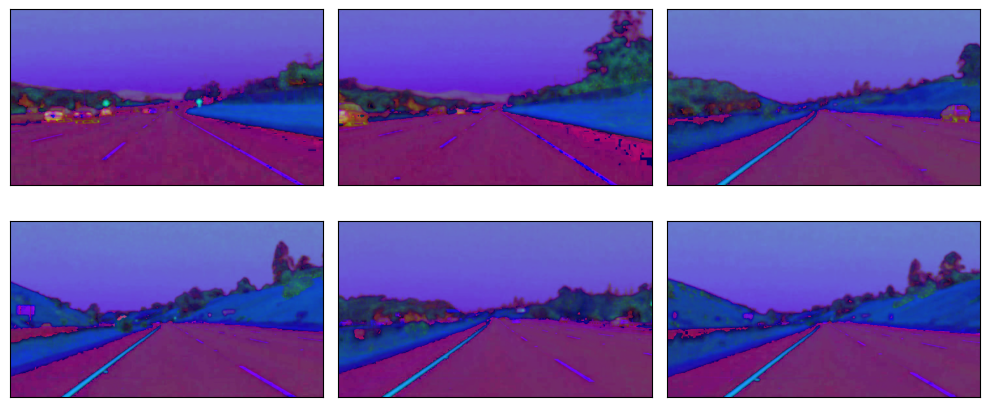

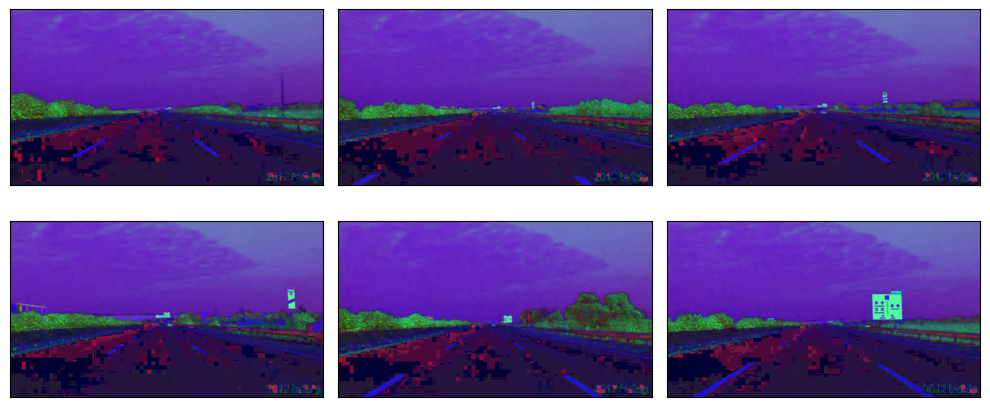

In [6]:
# convert images to HSV color space and show
def convert_HSV(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

show_images(list(map(convert_HSV, test_images)))
show_images(list(map(convert_HSV, bonus_images)))

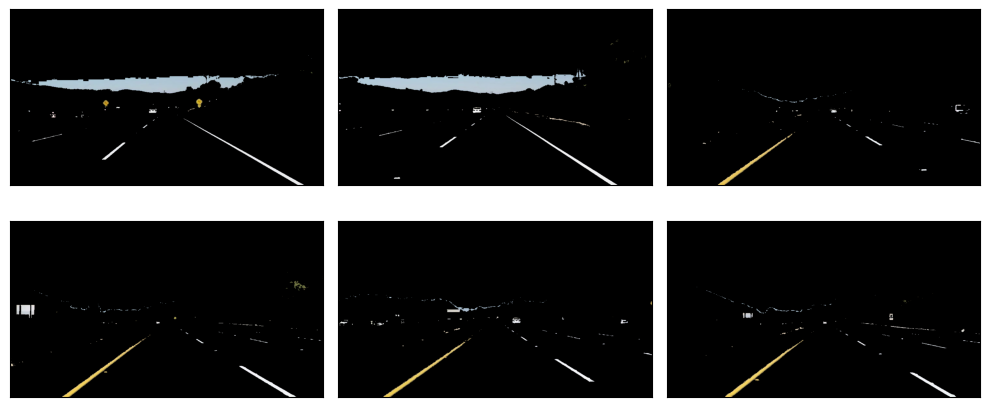

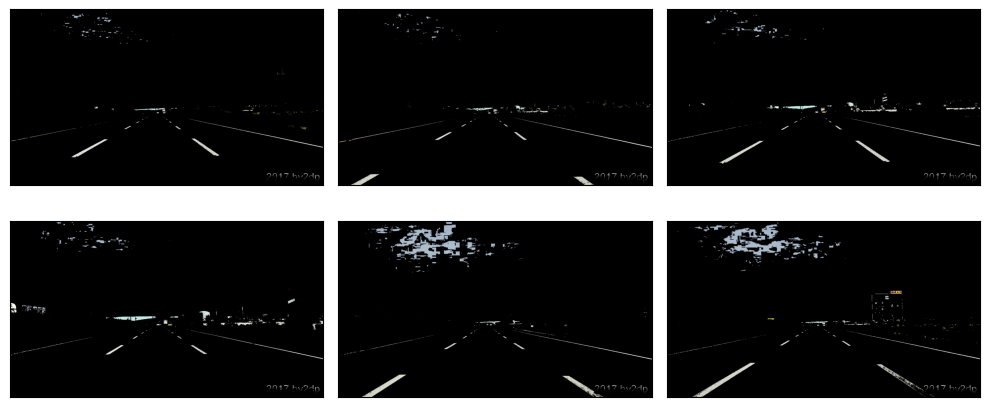

In [7]:
def apply_yellow_white_mask_HSV(image):
    # used cv2 built-in function to convert images to HSL color space
    converted_image=convert_HSV(image)
    # white mask
    low=np.uint8([0, 0, 200])
    top=np.uint8([255, 50, 255])
    white_mask=cv2.inRange(converted_image, low, top)

    # yellow mask
    low=np.uint8([20, 100, 100])
    top=np.uint8([40, 255, 255])
    yellow_mask=cv2.inRange(converted_image, low, top)

    # combine the mask
    mask=cv2.bitwise_or(white_mask, yellow_mask)
    masked=cv2.bitwise_and(image, image, mask=mask)
    return masked

HSV_test_images=(list(map(apply_yellow_white_mask_HSV, test_images)))
HSV_bonus_images=(list(map(apply_yellow_white_mask_HSV, bonus_images)))

show_images(HSV_test_images)
show_images(HSV_bonus_images)

### Canny Edge Detection探討

#### Grayscaling & Gaussian Blur

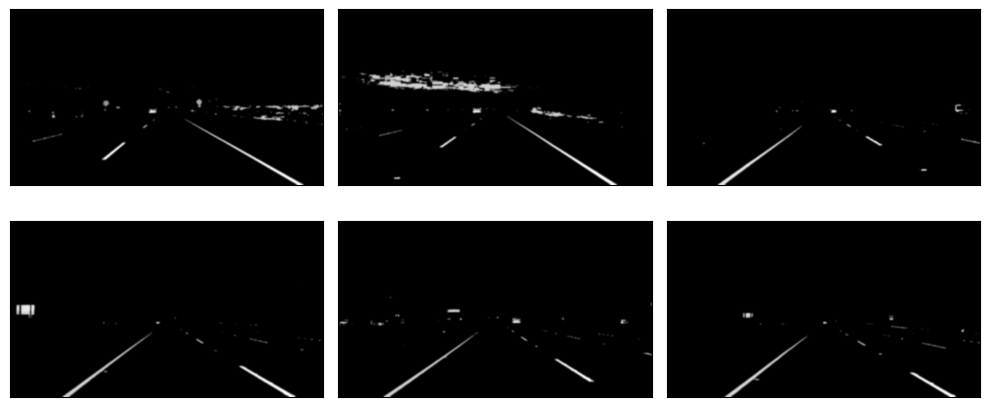

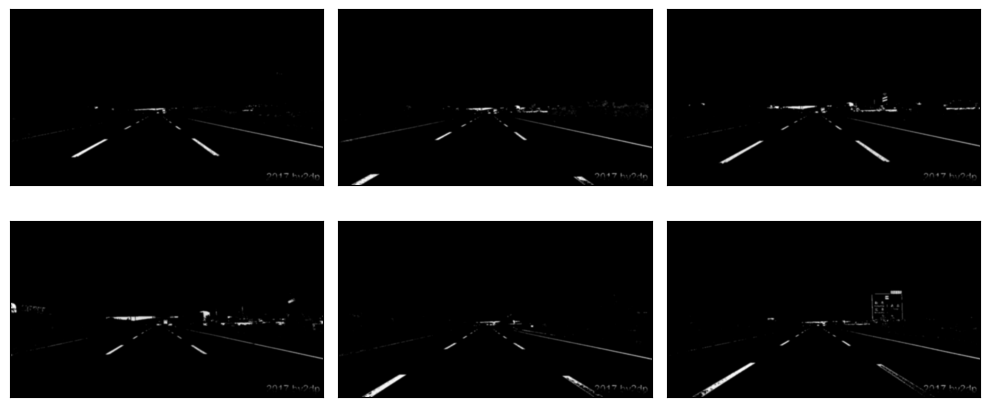

In [8]:
def convert_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def gaussian_blur(image, kernel_size=11):
    # NOTE: kernel_size must be postive and odd number
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# convert the HSL images into grayscale
gray_test_images=list(map(convert_grayscale, HSL_test_images))
gray_bonus_images=list(map(convert_grayscale, HSL_bonus_images))

# try different kernel_size 7, 11, 15
blurred_test_images=list(map(lambda image: gaussian_blur(image, 11), gray_test_images))
blurred_bonus_images=list(map(lambda image: gaussian_blur(image, 11), gray_bonus_images))

show_images(blurred_test_images)
show_images(blurred_bonus_images)

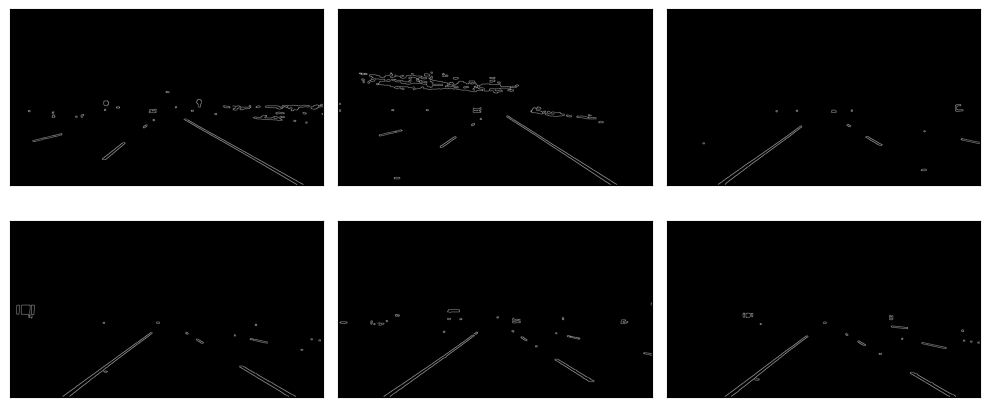

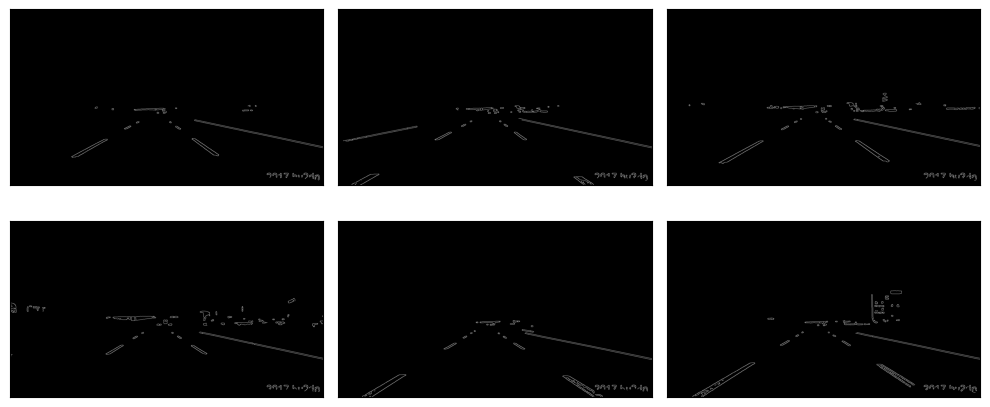

In [9]:
def detect_edges(image, low_threshold=50, high_threshold=150):
    return cv2.Canny(image, low_threshold, high_threshold)

# detect the edges from the blurred images
edge_test_images=list(map(lambda image: detect_edges(image, 50, 150), blurred_test_images))
edge_bonus_images=list(map(lambda image: detect_edges(image, 50, 150), blurred_bonus_images))

show_images(edge_test_images)
show_images(edge_bonus_images)

### Region of Interest Selection探討

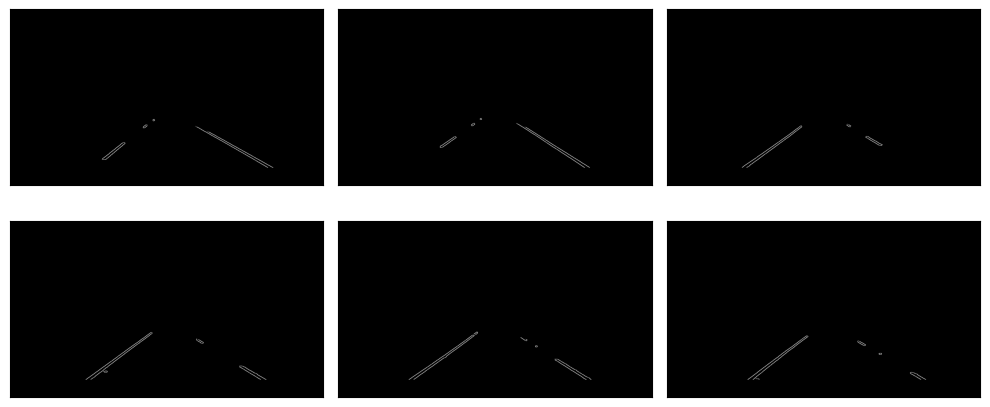

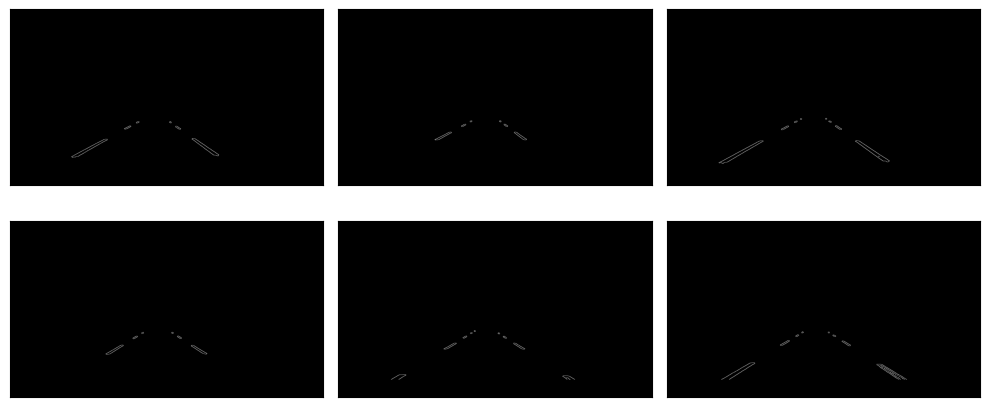

In [10]:
# create a mask and apply to the images
def filter_region(image, vertices):
    mask=np.zeros_like(image)
    if len(mask.shape)==2:
        # only one channel
        cv2.fillPoly(mask, vertices, 255)
    else:
        # not just one channel
        cv2.fillPoly(mask, vertices, (255,)*mask.shape[2])
    return cv2.bitwise_and(image, mask)

def select_region(image):
    rows, cols=image.shape[:2]
    # define the vertices of the polygon
    bottom_left=[cols*0.1, rows*0.9]
    top_left=[cols*0.4, rows*0.6]
    bottom_right=[cols*0.9, rows*0.9]
    top_right=[cols*0.5, rows*0.6]
    vertices=np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return filter_region(image, vertices)

# apply ROI mask to the images
roi_test_images=list(map(select_region, edge_test_images))
roi_bonus_images=list(map(select_region, edge_bonus_images))

show_images(roi_test_images)
show_images(roi_bonus_images)

### Hough Transform Line Detection探討

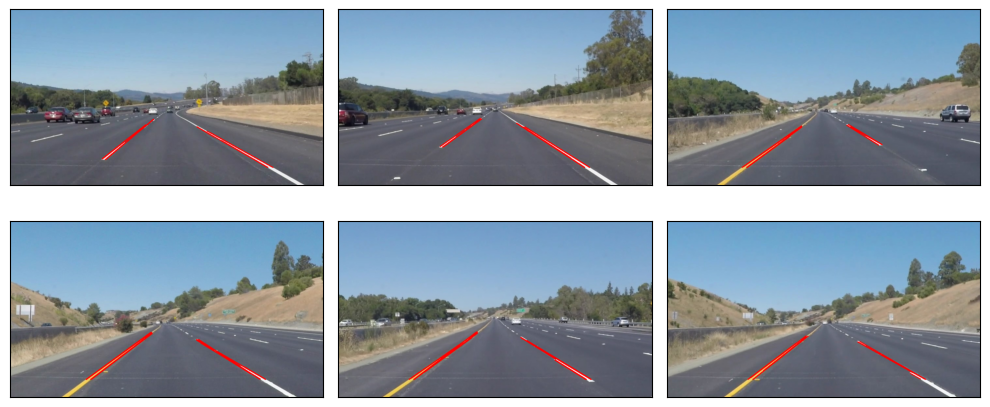

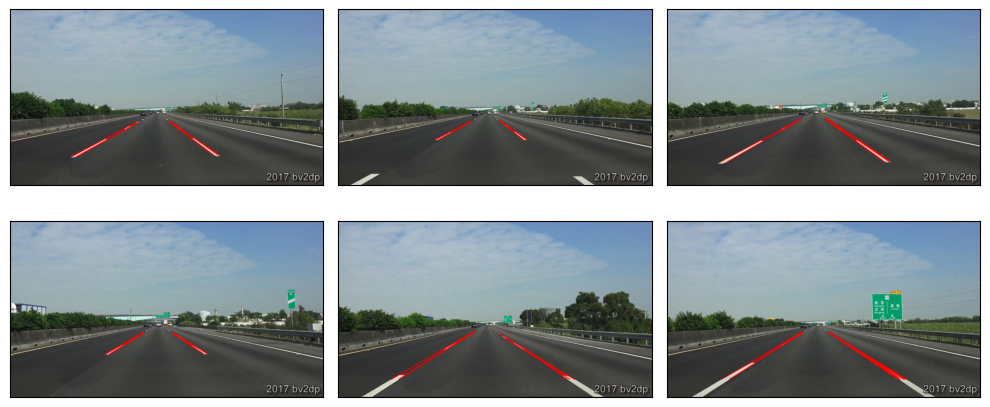

In [11]:
def hough_lines(image):
    return cv2.HoughLinesP(image, rho=1, theta=np.pi/180, threshold=20, minLineLength=20, maxLineGap=300)

# we get the list of lines
list_of_test_lines=list(map(hough_lines, roi_test_images))
list_of_bonus_lines=list(map(hough_lines, roi_bonus_images))

def draw_lines(image, lines, color=[255, 0, 0], thickness=2, make_copy=True):
    if make_copy:
        image=np.copy(image)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), color , thickness)
    return image

# apply the lines to the original images 
line_test_images=[]
line_bonus_images=[]
for image, lines in zip(test_images, list_of_test_lines):
    line_test_images.append(draw_lines(image, lines))

for image, lines in zip(bonus_images, list_of_bonus_lines):
    line_bonus_images.append(draw_lines(image, lines))

show_images(line_test_images)
show_images(line_bonus_images)

### Averaging and Extrapolating Lane Lines

#### Averaging Lane Lines

In [12]:
'''
since there's multiple lines either in the right or left lane lines
so, we need to 
'''
def averaging_lane_lines(lines):
    left_lines=[]
    left_weights=[]
    right_lines=[]
    right_weights=[]

    for line in lines:
        for x1, y1, x2, y2 in line:
            if x2==x1:
                continue # when the line is vertical, ignore it
            slope=(y2-y1)/(x2-x1)
            intercept=y1-slope*x1
            length=np.sqrt((y2-y1)**2+(x2-x1)**2)
            # since the y-coordinate is reversed, so the left_lines slope is actuaclly negative
            if slope<0:
                left_lines.append((slope, intercept))
                left_weights.append((length))
            else:
                right_lines.append((slope, intercept))
                right_weights.append((length))
    
    # add more weight to longer weight
    left_lane_lines=np.dot(left_weights, left_lines)/np.sum(left_weights) if len(left_weights)>0 else None
    right_lane_lines=np.dot(right_weights, right_lines)/np.sum(right_weights) if len(right_weights)>0 else None

    # get the average lane lines slope and intercept
    return left_lane_lines, right_lane_lines

'''
The function can convert the lane lines from slope/intercept form into pixel points
'''
def cvt_to_points(y1, y2, line):
    if line is None:
        return None
    
    slope, intercept=line
    # convert line to point, and convert them to int data format
    x1=int((y1-intercept)/slope)
    x2=int((y2-intercept)/slope)
    y1=int(y1)
    y2=int(y2)

    return ((x1,y1), (x2, y2))

#### Extrapolating Lane Lines


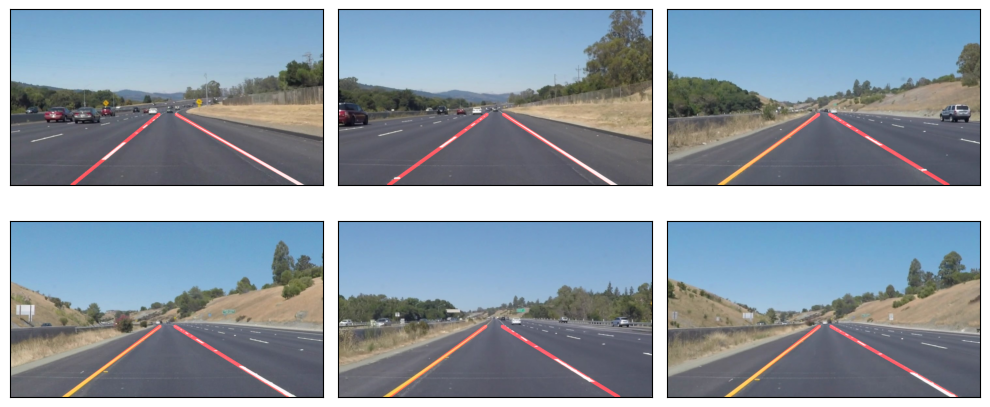

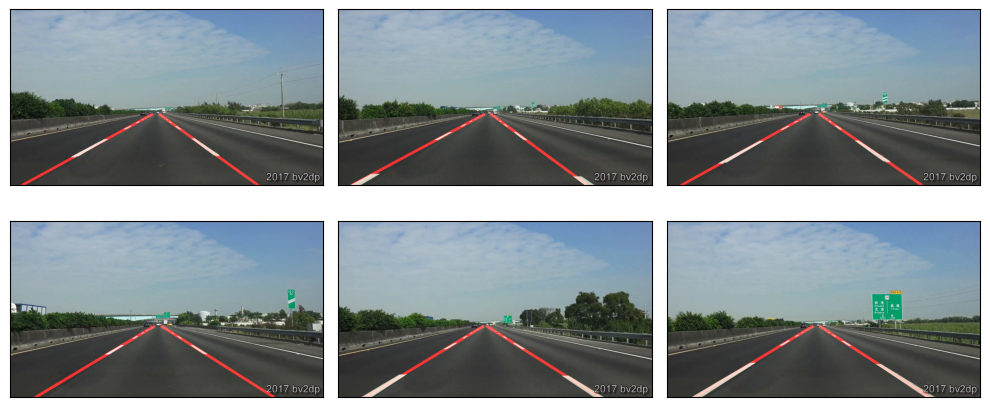

In [13]:
# use the cvt_to_point to make the line longer
def extrapolating_lane_lines(image, lines):
    left_lane, right_lane=averaging_lane_lines(lines)

    # the default extrapolating lines y
    y1=image.shape[0]
    y2=y1*0.6

    left_line=cvt_to_points(y1, y2, left_lane)
    right_line=cvt_to_points(y1, y2, right_lane)
    return left_line, right_line

# draw the final result lines on the images
def draw_lane_lines(image, lines, color=[255, 0, 0], thickness=10):
    line_image=np.zeros_like(image)
    for line in lines:
        if line is not None:
            # draw the line
            cv2.line(line_image, *line, color, thickness)
    
    # combine the image with original one
    return cv2.addWeighted(image, 1.0, line_image, 0.95, 0.0)

lane_test_images=[]
lane_bonus_images=[]
for image, lines in zip(test_images, list_of_test_lines):
    lane_test_images.append(draw_lane_lines(image, extrapolating_lane_lines(image, lines)))

for image, lines in zip(bonus_images, list_of_bonus_lines):
    lane_bonus_images.append(draw_lane_lines(image, extrapolating_lane_lines(image, lines)))

show_images(lane_test_images)
show_images(lane_bonus_images)

### Apply Pipeline to the Videos


In [14]:
from collections import deque

QUEUE_LENGTH=10

class LaneDetector:
    def __init__(self):
        self.left_lines=deque(maxlen=QUEUE_LENGTH)
        self.right_lines=deque(maxlen=QUEUE_LENGTH)

    def process(self, image):
        # pipeline of the lane lines detection
        white_yellow=apply_yellow_white_mask_HSL(image)
        gray_image=convert_grayscale(white_yellow)
        gaussian_image=gaussian_blur(gray_image)
        edges_image=detect_edges(gaussian_image)
        roi_image=select_region(edges_image)
        lines=hough_lines(roi_image)
        left_line, right_line=extrapolating_lane_lines(image, lines)

        def mean_line(line, lines):
            if line is not None:
                lines.append(line)
            if len(lines)>0:
                line=np.mean(lines, axis=0, dtype=np.int32)
                line=tuple(map(tuple, line))
            return line
        left_line=mean_line(left_line, self.left_lines)
        right_line=mean_line(right_line, self.right_lines)


        return draw_lane_lines(image, (left_line, right_line))
    

# process the video
def process_video(input_video, output_video):
    # init a LaneDetector Object
    detector=LaneDetector()
    # get the input video clip
    clip=VideoFileClip(os.path.join('test_videos', input_video))
    # use pipeline of detector.process to process the video clip
    processed=clip.fl_image(detector.process)
    # write the processed result into output video file
    processed.write_videofile(os.path.join('test_videos_output', output_video), audio=False)

#### Lane Lines Detection

In [15]:
%time process_video('solidWhiteRight.mp4', 'white.mp4')

Moviepy - Building video test_videos_output\white.mp4.
Moviepy - Writing video test_videos_output\white.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output\white.mp4
CPU times: total: 422 ms
Wall time: 3.02 s


In [16]:
%time process_video('solidYellowLeft.mp4', 'yellow.mp4')

Moviepy - Building video test_videos_output\yellow.mp4.
Moviepy - Writing video test_videos_output\yellow.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output\yellow.mp4
CPU times: total: 1.3 s
Wall time: 7.91 s


In [17]:
%time process_video('challenge.mp4', 'extra.mp4')

Moviepy - Building video test_videos_output\extra.mp4.
Moviepy - Writing video test_videos_output\extra.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output\extra.mp4
CPU times: total: 1.38 s
Wall time: 5.99 s


In [18]:
%time process_video('bonus.mp4', 'bonus_result.mp4')

Moviepy - Building video test_videos_output\bonus_result.mp4.
Moviepy - Writing video test_videos_output\bonus_result.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output\bonus_result.mp4
CPU times: total: 6.5 s
Wall time: 18.8 s


### 嘗試解決車道線誤判狀況

#### 地板有陰影或是淺色地板

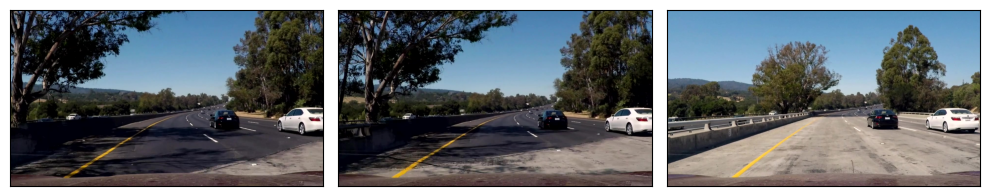

In [19]:
# load the challenge_images
challenge_images = [plt.imread(path) for path in glob.glob('challenge_images/*.jpg')]

show_images(challenge_images)

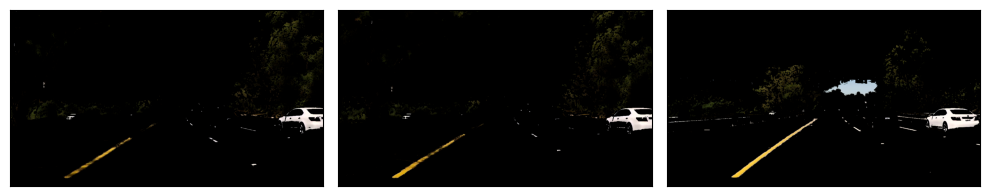

In [20]:
HSL_challenge_images=(list(map(apply_yellow_white_mask_HSL, challenge_images)))

show_images(HSL_challenge_images)

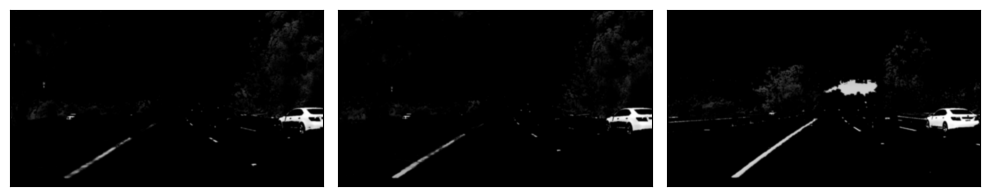

In [21]:
gray_challenge_images=list(map(convert_grayscale, HSL_challenge_images))
blurred_challenge_images=list(map(lambda image: gaussian_blur(image, 11), gray_challenge_images))
show_images(blurred_challenge_images)

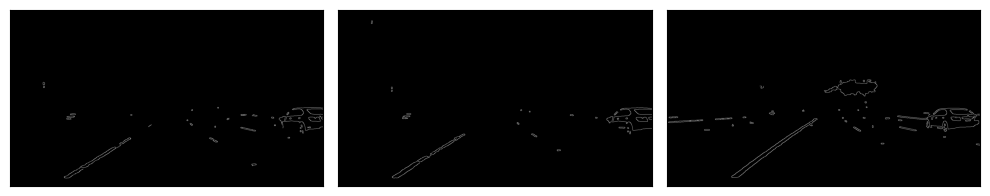

In [22]:
edge_challenge_images=list(map(lambda image: detect_edges(image, 50, 150), blurred_challenge_images))
show_images(edge_challenge_images)

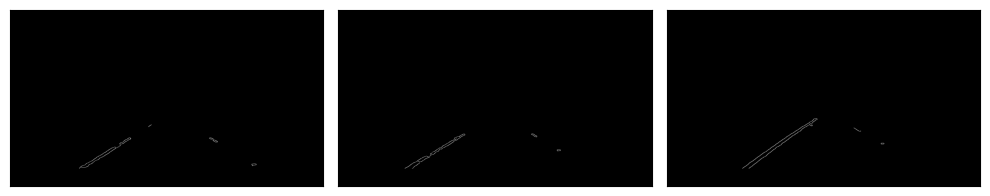

In [23]:
roi_challenge_images=list(map(select_region, edge_challenge_images))
show_images(roi_challenge_images)

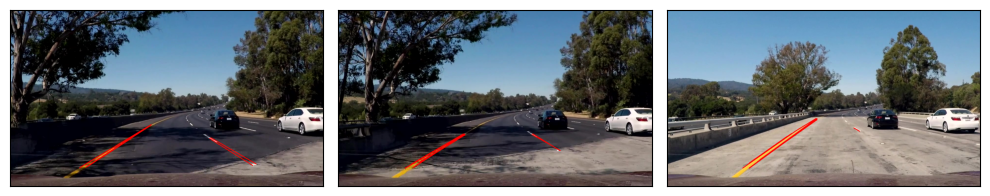

In [24]:
list_of_challenge_lines=list(map(hough_lines, roi_challenge_images))
line_challenge_images=[]
for image, lines in zip(challenge_images, list_of_challenge_lines):
    line_challenge_images.append(draw_lines(image, lines))

show_images(line_challenge_images)

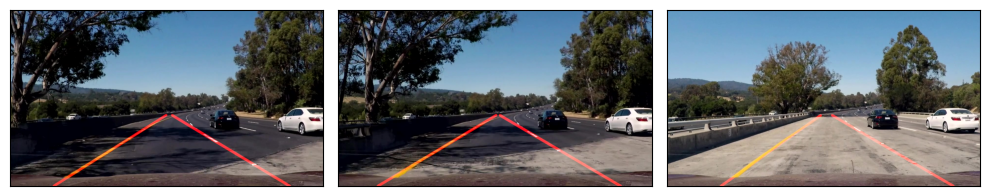

In [25]:
lane_challenge_images=[]
for image, lines in zip(challenge_images, list_of_challenge_lines):
    lane_challenge_images.append(draw_lane_lines(image, extrapolating_lane_lines(image, lines)))

show_images(lane_challenge_images)


#### 結論: 因為當我利用幾張可能產生問題的圖片去跑pipeline處理後，發現車道線的確有被正確辨識，於是，我認為可能是影片處理的QUEUE_LENGTH設定太大了，導致當有幾張的車道線判斷有誤差後，會影響影片之後太多幀數，因而有車道線偏移，並且過很久才會校正回來。於是，我把QUEUE_LENGTH由50幀改為10幀，的確就改善了地板有陰影或地板較淺色所造成的誤判。

#### 影片右下角有白色字體及最外側車道線的干擾

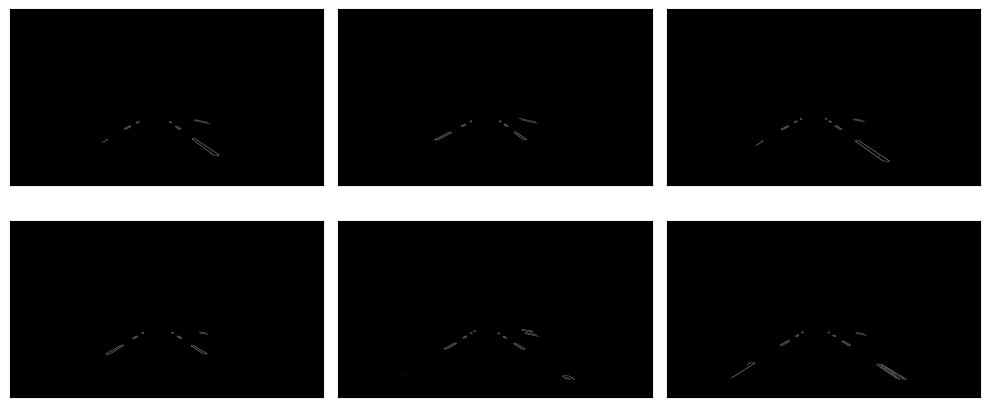

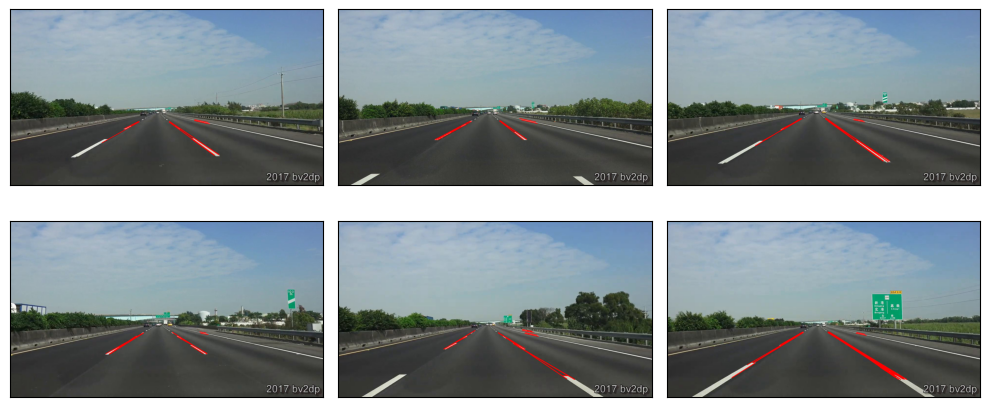

In [26]:
# create a mask and apply to the images, and show the mask
def filter_region_and_show_polygon(image, vertices):
    mask=np.zeros_like(image)
    if len(mask.shape)==2:
        # only one channel
        cv2.fillPoly(mask, vertices, 255)
    else:
        # not just one channel
        cv2.fillPoly(mask, vertices, (255,)*mask.shape[2])
    # show the mask
    filtered_image=cv2.bitwise_and(image, mask)
    return filtered_image

def select_region_original(image):
    rows, cols=image.shape[:2]
    # define the vertices of the polygon
    bottom_left=[cols*0.2, rows*0.9]
    top_left=[cols*0.4, rows*0.6]
    bottom_right=[cols*0.8, rows*0.9]
    top_right=[cols*0.6, rows*0.6]
    vertices=np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return filter_region_and_show_polygon(image, vertices)


def select_region_after(image):
    rows, cols=image.shape[:2]
    # define the vertices of the polygon
    bottom_left=[cols*0.1, rows*0.9]
    top_left=[cols*0.4, rows*0.6]
    bottom_right=[cols*0.9, rows*0.9]
    top_right=[cols*0.5, rows*0.6]
    vertices=np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return filter_region_and_show_polygon(image, vertices)

bonus_images = [plt.imread(path) for path in glob.glob('bonus_images/*.jpg')]
HSL_bonus_images=(list(map(apply_yellow_white_mask_HSL, bonus_images)))
gray_bonus_images=list(map(convert_grayscale, HSL_bonus_images))
blurred_bonus_images=list(map(lambda image: gaussian_blur(image, 11), gray_bonus_images))
edge_bonus_images=list(map(lambda image: detect_edges(image, 50, 150), blurred_bonus_images))
roi_bonus_images=list(map(select_region_original, edge_bonus_images))
show_images(roi_bonus_images)

list_of_bonus_lines=list(map(hough_lines, roi_bonus_images))
line_bonus_images=[]
for image, lines in zip(bonus_images, list_of_bonus_lines):
    line_bonus_images.append(draw_lines(image, lines))

show_images(line_bonus_images)

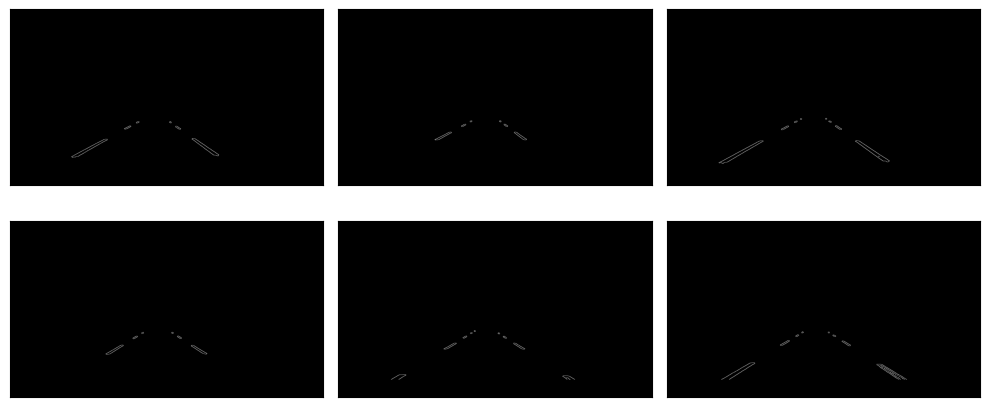

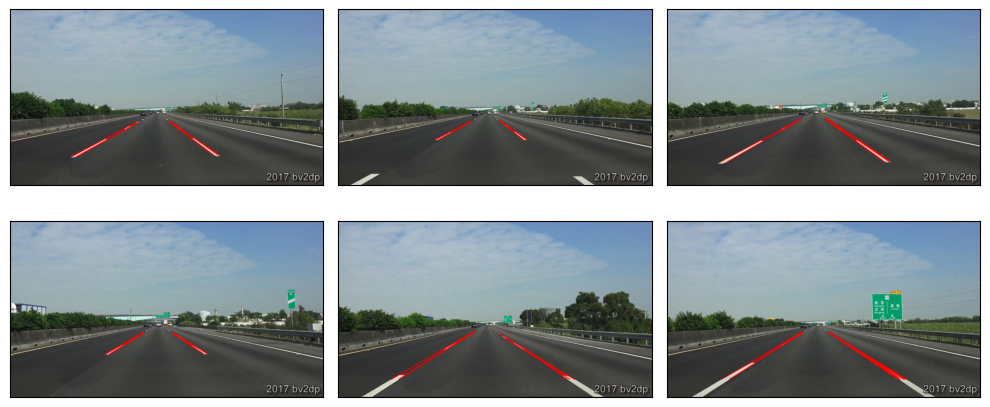

In [27]:
bonus_images = [plt.imread(path) for path in glob.glob('bonus_images/*.jpg')]
HSL_bonus_images=(list(map(apply_yellow_white_mask_HSL, bonus_images)))
gray_bonus_images=list(map(convert_grayscale, HSL_bonus_images))
blurred_bonus_images=list(map(lambda image: gaussian_blur(image, 11), gray_bonus_images))
edge_bonus_images=list(map(lambda image: detect_edges(image, 50, 150), blurred_bonus_images))
roi_bonus_images=list(map(select_region_after, edge_bonus_images))
show_images(roi_bonus_images)

list_of_bonus_lines=list(map(hough_lines, roi_bonus_images))
line_bonus_images=[]
for image, lines in zip(bonus_images, list_of_bonus_lines):
    line_bonus_images.append(draw_lines(image, lines))

show_images(line_bonus_images)